# Lesson 1 - What's this dish called?

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
from fastai import *
from fastai.vision import *

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart


## Looking at the data

In [4]:
import os
os.getcwd()

'/home/jupyter/tutorials/fastai/course-v3/nbs/dl1'

In [5]:
zip_path = Path('data_amir/zips')
path = Path('data_amir/food')
print(zip_path)

data_amir/zips


In [6]:
import zipfile
#zip_ref = zipfile.ZipFile(zip_path/'food2.zip', 'r')
#zip_ref.extractall(path)
#zip_ref.close()

In [7]:
path.ls()

[PosixPath('data_amir/food/Lasagne'),
 PosixPath('data_amir/food/Nimroo'),
 PosixPath('data_amir/food/Soup'),
 PosixPath('data_amir/food/Dizi'),
 PosixPath('data_amir/food/SabziPoloBaMahi'),
 PosixPath('data_amir/food/AdasPolo'),
 PosixPath('data_amir/food/Fesenjoun'),
 PosixPath('data_amir/food/Omlet'),
 PosixPath('data_amir/food/BaqaliPoloBaGousht'),
 PosixPath('data_amir/food/Macaronni'),
 PosixPath('data_amir/food/Shishlik'),
 PosixPath('data_amir/food/KokooSabzi'),
 PosixPath('data_amir/food/Olvieh'),
 PosixPath('data_amir/food/models'),
 PosixPath('data_amir/food/QormehSabzi'),
 PosixPath('data_amir/food/Qeimeh'),
 PosixPath('data_amir/food/Jouje'),
 PosixPath('data_amir/food/Ash_reshte'),
 PosixPath('data_amir/food/Koubideh'),
 PosixPath('data_amir/food/.ipynb_checkpoints'),
 PosixPath('data_amir/food/KhoreshKaraf'),
 PosixPath('data_amir/food/TahChin'),
 PosixPath('data_amir/food/Pizza'),
 PosixPath('data_amir/food/LoubiaPolo')]

In [8]:
#path_anno = path/'annotations'
#path_img = path/'images'

In [9]:
#fnames = get_image_files(path_img)
#fnames[:5]

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['AdasPolo',
 'Ash_reshte',
 'BaqaliPoloBaGousht',
 'Dizi',
 'Fesenjoun',
 'Jouje',
 'KhoreshKaraf',
 'KokooSabzi',
 'Koubideh',
 'Lasagne',
 'LoubiaPolo',
 'Macaronni',
 'Nimroo',
 'Olvieh',
 'Omlet',
 'Pizza',
 'Qeimeh',
 'QormehSabzi',
 'SabziPoloBaMahi',
 'Shishlik',
 'Soup',
 'TahChin']

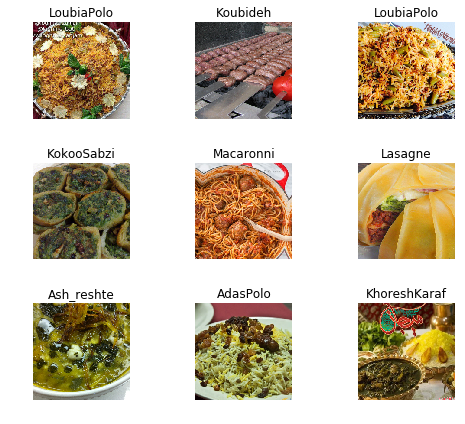

In [8]:
data.show_batch(rows=3, figsize=(7,6))

In [9]:
print(data.classes)
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

['AdasPolo', 'Ash_reshte', 'BaqaliPoloBaGousht', 'Dizi', 'Fesenjoun', 'Jouje', 'KhoreshKaraf', 'KokooSabzi', 'Koubideh', 'Lasagne', 'LoubiaPolo', 'Macaronni', 'Nimroo', 'Olvieh', 'Omlet', 'Pizza', 'Qeimeh', 'QormehSabzi', 'SabziPoloBaMahi', 'Shishlik', 'Soup', 'TahChin']


(['AdasPolo',
  'Ash_reshte',
  'BaqaliPoloBaGousht',
  'Dizi',
  'Fesenjoun',
  'Jouje',
  'KhoreshKaraf',
  'KokooSabzi',
  'Koubideh',
  'Lasagne',
  'LoubiaPolo',
  'Macaronni',
  'Nimroo',
  'Olvieh',
  'Omlet',
  'Pizza',
  'Qeimeh',
  'QormehSabzi',
  'SabziPoloBaMahi',
  'Shishlik',
  'Soup',
  'TahChin'],
 22,
 1611,
 440)

Then we can remove any images that can't be opened:

In [10]:
classes = data.classes
#for c in classes:
  #  print(c)
 #   verify_images(path/c, delete=True, max_workers=8)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [11]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [12]:
learn.fit_one_cycle(6)

Total time: 02:26
epoch  train_loss  valid_loss  error_rate
1      3.127508    2.053771    0.568182    (00:34)
2      2.223736    1.204043    0.336364    (00:21)
3      1.615471    0.959740    0.281818    (00:23)
4      1.235348    0.862806    0.263636    (00:24)
5      0.965731    0.835835    0.259091    (00:21)
6      0.822028    0.830049    0.259091    (00:21)



In [27]:
#learn.save('stage-1-food-resnet50')
learn.save('stage_1_food-resnet34')

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

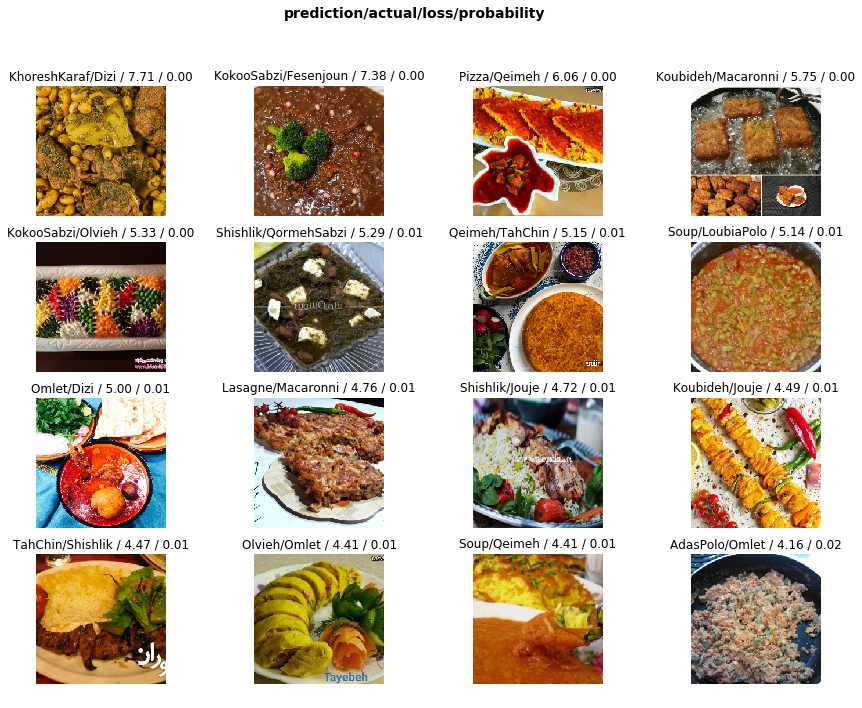

In [32]:
interp.plot_top_losses(16, figsize=(15,11))

Possible values for the plot color theme are: 
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

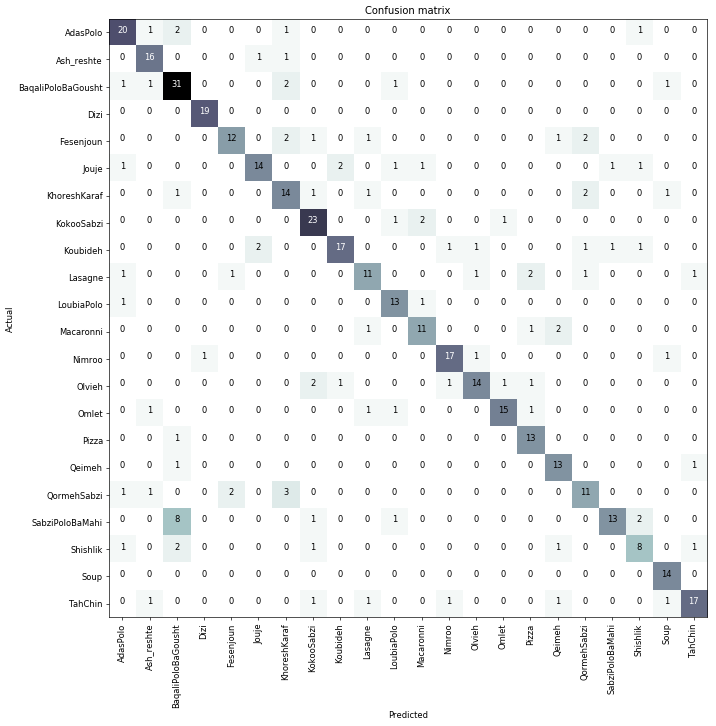

In [26]:
interp.plot_confusion_matrix(normalize = False,figsize=(12,12), dpi=60,cmap='bone_r')

In [34]:
interp.most_confused(min_val=2)

[('Fesenjoun', 'QormehSabzi', 7),
 ('SabziPoloBaMahi', 'BaqaliPoloBaGousht', 7),
 ('Jouje', 'Koubideh', 4),
 ('Shishlik', 'Jouje', 4),
 ('AdasPolo', 'BaqaliPoloBaGousht', 3),
 ('BaqaliPoloBaGousht', 'AdasPolo', 3),
 ('KhoreshKaraf', 'QormehSabzi', 3),
 ('TahChin', 'LoubiaPolo', 3)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [13]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


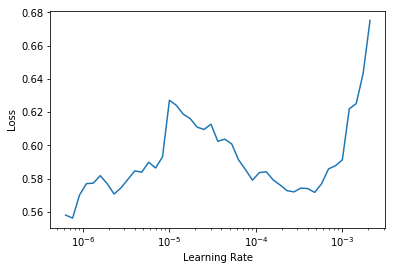

In [21]:
learn.recorder.plot(skip_end = 25)

In [22]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-5,0.3e-4))

Total time: 01:32
epoch  train_loss  valid_loss  error_rate
1      0.559420    0.823223    0.252273    (00:23)
2      0.562980    0.788397    0.247727    (00:22)
3      0.518039    0.748688    0.236364    (00:24)
4      0.493406    0.753665    0.236364    (00:22)



That's a pretty accurate model!

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

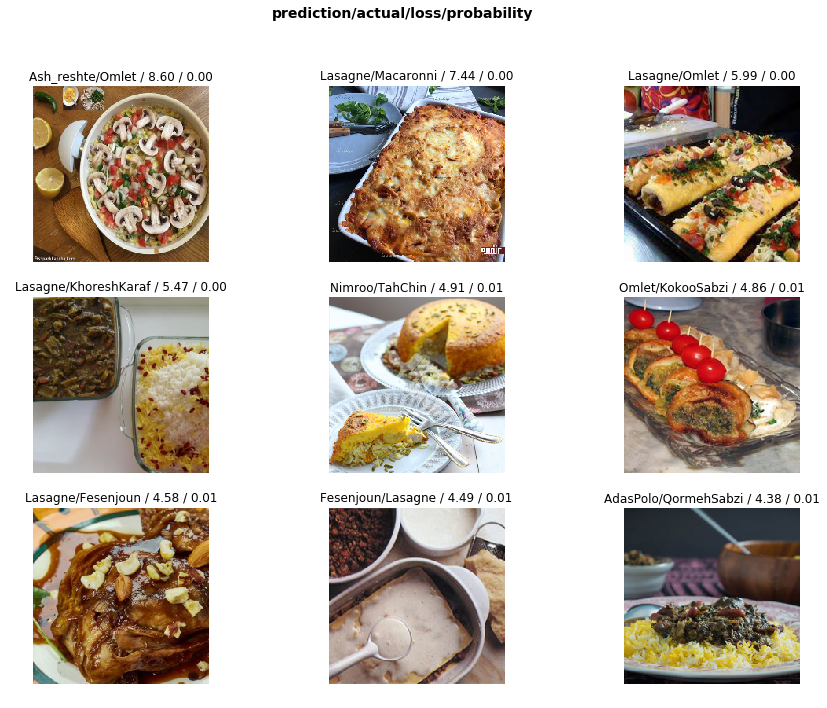

In [24]:
interp.plot_top_losses(9, figsize=(15,11))

In [25]:
interp.most_confused(min_val=2)

[('SabziPoloBaMahi', 'BaqaliPoloBaGousht', 8),
 ('QormehSabzi', 'KhoreshKaraf', 3)]

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `FileDeleter` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

First we need to get the file paths from our top_losses. Here's a handy function that pulls out all our top_losses:

In [42]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [43]:
fd = FileDeleter(file_paths=top_loss_paths)

Button(button_style='primary', description='Confirm', style=ButtonStyle())

Now we can go back and re run the whole thing with the new dataset or try the resnet50 model.